In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("Numpy version:", np.__version__)
print("Matplotlib version:", plt.__version__)
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.8.0

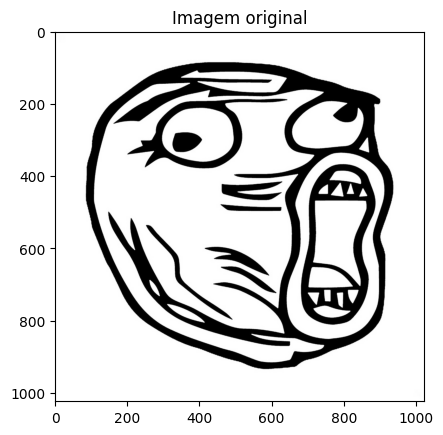

In [33]:
image = cv2.imread("./imgs/lolface.jpeg")

plt.imshow(image)
plt.title("Imagem original")
plt.show()

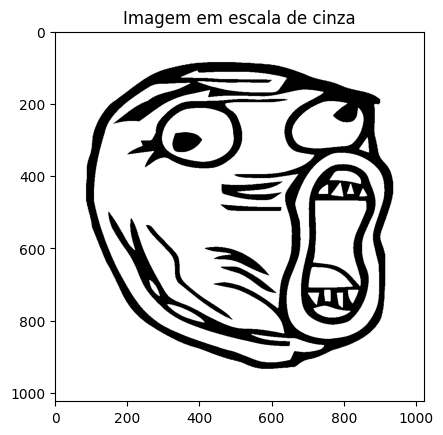

In [34]:
# Convert to B and W only img with a threshold of 127
bw = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]
bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)

plt.imshow(bw , cmap="gray")
plt.title("Imagem em escala de cinza")
plt.show()

In [56]:
def erosion(kernel: np.ndarray, bw: np.ndarray) -> np.ndarray:
    kernel_w = kernel.shape[0]
    kernel_h = kernel.shape[1]
    half_w = kernel_w // 2
    half_h = kernel_h // 2
    erosion = np.zeros(bw.shape, np.uint8)
    for x in range(half_w, bw.shape[0]-half_w):
        for y in range(half_h, bw.shape[1]-half_h):
            # only keep what matches the kernel
            img_slice = bw[x-half_w:x+half_w+1, y-half_h:y+half_h+1]
            if np.array_equal(img_slice, kernel):
                erosion[x,y] = 255
    return erosion

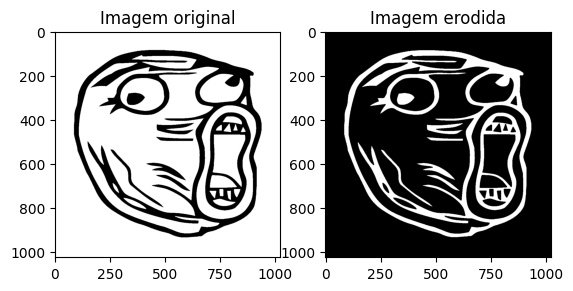

In [57]:
kernel = np.zeros((3,3), np.uint8)
erosion_img = erosion(kernel, bw)
fig , (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(bw, cmap="gray")
ax1.set_title("Imagem original")
ax2.imshow(erosion_img, cmap="gray")
ax2.set_title("Imagem erodida")
plt.show()

In [50]:
import imageio
frames = []
pp_frame = bw
frames.append(pp_frame)
kernel = np.ones((3,3), np.uint8)
for i in range(50):
    print(f"Generating frame {i+1}")
    pp_frame = erosion(kernel, pp_frame)
    frames.append(pp_frame)

Generating frame 1

Generating frame 2

Generating frame 3

Generating frame 4

Generating frame 5

Generating frame 6

Generating frame 7

Generating frame 8

Generating frame 9

Generating frame 10

Generating frame 11

Generating frame 12

Generating frame 13

Generating frame 14

Generating frame 15

Generating frame 16

Generating frame 17

Generating frame 18

Generating frame 19

Generating frame 20

Generating frame 21

Generating frame 22

Generating frame 23

Generating frame 24

Generating frame 25

Generating frame 26

Generating frame 27

Generating frame 28

Generating frame 29

Generating frame 30

Generating frame 31

Generating frame 32

Generating frame 33

Generating frame 34

Generating frame 35

Generating frame 36

Generating frame 37

Generating frame 38

Generating frame 39

Generating frame 40

Generating frame 41

Generating frame 42

Generating frame 43

Generating frame 44

Generating frame 45

Generating frame 46

Generating frame 47

Generating frame 48

Generating frame 49

Generating frame 50

In [53]:
save_path = "./imgs/erosion.gif"
imageio.mimsave(save_path, frames)

![](./imgs/erosion.gif)